<a href="https://colab.research.google.com/github/navas604/Statistical-Learning-II/blob/main/Practica%206%20-%20Back%20Propagation%20Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Statistical Learning II**
## **Antonio Everardo Navas Contreras, 14003163**
## **17/09/2021**

---

## **PRÁCTICA 6 - BACK PROPAGATION Y ANÁLISIS DE REPRESENTACIONES INTERMEDIAS**

---

### CARGAR LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### FUNCIONES DE ACTIVACIÓN

In [2]:
def relu(x):
  return np.maximum(0.0, x)

def dx_relu(x):
  return (x > 0).astype(np.float)

### RED NEURONAL, FORWARD AND BACK PROPAGATION

In [3]:
class RedNeuronal:
  def init_params(self, x, neurons_HL1, neurons_HL2, neurons_output):
    # Numero de entradas y observacioens
    n_inputs = x.shape[1]
    n_obs = x.shape[0]

    # Inicialización aleatoria de los pesos o parámetros de cada capa de la red neuronal
    params_HL1 = np.random.normal(loc=0.0, scale=0.1, size=(n_inputs, neurons_HL1))
    params_HL2 = np.random.normal(loc=0.0, scale=0.1, size=(neurons_HL1, neurons_HL2))
    params_output = np.random.normal(loc=0.0, scale=0.1, size=(neurons_HL2, neurons_output))

    # Inicialización aleatoria de los bias de cada capa de la red neuronal
    b_HL1, b_HL2, b_output = np.random.normal(loc=0.0, scale=0.1, size=3)

    return params_HL1, params_HL2, params_output, b_HL1, b_HL2, b_output

  def forward_propagation(self, x, params_HL1, params_HL2, params_output):
    # Primera capa oculta
    z_HL1 = np.matmul(x, params_HL1) + b_HL1
    HL1 = relu(z_HL1)

    # Segunda capa oculta
    z_HL2 = np.matmul(HL1, params_HL2) + b_HL2
    HL2 = relu(z_HL2)

    # Capa de salida
    z_y_aprox = np.matmul(HL2, params_output) + b_output
    y_aprox = relu(z_y_aprox)

    return HL1, HL2, y_aprox

  def back_propagation(self, HL1, HL2, y_aprox, params_HL2, params_output, y, n_obs):
    # Capa de salida
    d_z_y_aprox = y_aprox - y
    d_params_output = np.matmul(HL2.T, d_z_y_aprox) / n_obs
    
    # Segunda capa oculta
    d_z_HL2 = np.matmul(d_z_y_aprox, params_output.T) * dx_relu(HL2)
    d_params_HL2 = np.matmul(HL1.T, d_z_HL2) / n_obs
    
    # Primera capa oculta
    d_z_HL1 = np.matmul(d_z_HL2, params_HL2.T) * dx_relu(HL1)
    d_params_HL1 = np.matmul(x.T, d_z_HL1) / n_obs

    return d_params_output, d_params_HL2, d_params_HL1

  def train_func(self, x, y, params_HL1, params_HL2, params_output, epochs, lr):
    n_obs = x.shape[0]
    cost_list = []

    for i in range(epochs):
      HL1, HL2, y_aprox = self.forward_propagation(x, params_HL1, params_HL2, params_output)
      d_params_output, d_params_HL2, d_params_HL1 = self.back_propagation(HL1, HL2, y_aprox, params_HL2, params_output, y, n_obs)

      #cost = -(1/n_obs) * np.sum(y * np.log(y_aprox) + (1-y) * np.log(1-y_aprox))
      cost = np.mean(np.power(y_aprox - y, 2)) / 2
      cost_list.append(cost)

      params_HL1 -= lr * d_params_HL1
      params_HL2 -= lr * d_params_HL2
      params_output -= lr * d_params_output

    # Gráfica de la función de costo
    plt.plot(cost_list)
    plt.title("GRÁFICA DE FUNCIÓN DE COSTO",
              fontdict={"fontsize":14, "color":"black", "fontweight":"bold"})
    plt.xlabel("EPOCHS")
    plt.ylabel("COST")
    plt.show()

    return params_HL1, params_HL2, params_output

  def graph_HL2(self, HL_data):
    # Gráfica de capa intermedia, segunda capa oculta
    colors = np.where(np.sum(HL_data, axis=1) > 0.5, 'g', 'r')
    true = mpatches.Patch(color='g', label='1, True')
    false = mpatches.Patch(color='r', label='0, False')

    plt.scatter(HL_data[:,0], HL_data[:,1], color=colors)
    plt.title("GRÁFICA DE REPRESENTACIÓN INTERMEDIA\nSEGUNDA CAPA OCULTA",
              fontdict={"fontsize":14, "color":"black", "fontweight":"bold"})
    plt.legend(handles=[true, false])
    plt.show()

  def predicciones(self, x, params_HL1_final, params_HL2_final, params_output_final):
    HL1, HL2, y_aprox = self.forward_propagation(x, params_HL1_final, params_HL2_final, params_output_final)
    out_table = pd.DataFrame(columns=['Input', 'XOR'])

    for i in range(len(y_aprox)):
      if y_aprox[i]>=0.5:
        out_table = out_table.append({'Input':x[i], 'XOR':1}, ignore_index = True)
      else:
        out_table = out_table.append({'Input':x[i], 'XOR':0}, ignore_index = True)

    return HL2, out_table

### DATOS INICIALES

In [4]:
# 4 observaciones, 2 variables
x = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [5]:
# Parámetros de entrenamiento
epochs = 10000
lr = 0.01

# Número de neuronas en cada capa
neurons_HL1 = 5
neurons_HL2 = 2
neurons_output = 1

# Crear la red neuronal de la clase creada arriba
red = RedNeuronal()

### EXPERIMENTO 1

#### INICIALIZAR PARÁMETROS

In [6]:
params_HL1, params_HL2, params_output, b_HL1, b_HL2, b_output = red.init_params(x, neurons_HL1, neurons_HL2, neurons_output)

#### ENTRENAMIENTO

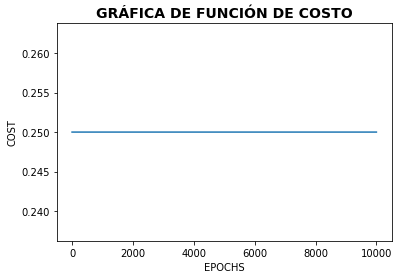

In [7]:
params_HL1_final, params_HL2_final, params_output_final = red.train_func(x, y, params_HL1, params_HL2, params_output, epochs, lr)

#### TEST - PREDICCIONES

In [8]:
HL2, output_table = red.predicciones(x, params_HL1_final, params_HL2_final, params_output_final)
output_table

,Input,XOR
0,"[1, 1]",0
1,"[1, 0]",0
2,"[0, 1]",0
3,"[0, 0]",0


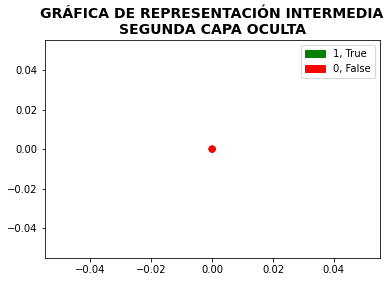

In [9]:
# Gráfica de capa intermedia, segunda capa oculta
red.graph_HL2(HL2)

### EXPERIMENTO 2

#### INICIALIZAR PARÁMETROS

In [10]:
params_HL1, params_HL2, params_output, b_HL1, b_HL2, b_output = red.init_params(x, neurons_HL1, neurons_HL2, neurons_output)

#### ENTRENAMIENTO

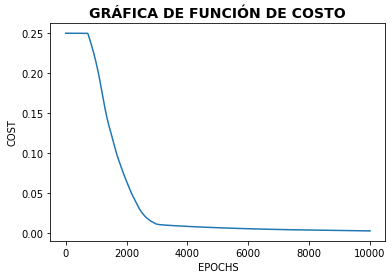

In [11]:
params_HL1_final, params_HL2_final, params_output_final = red.train_func(x, y, params_HL1, params_HL2, params_output, epochs, lr)

#### TEST - PREDICCIONES

In [12]:
HL2, output_table = red.predicciones(x, params_HL1_final, params_HL2_final, params_output_final)
output_table

,Input,XOR
0,"[1, 1]",0
1,"[1, 0]",1
2,"[0, 1]",1
3,"[0, 0]",0


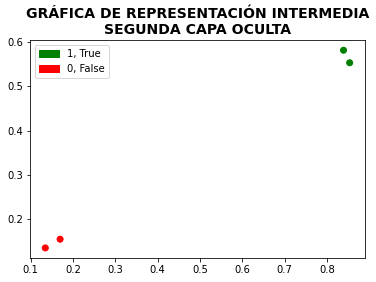

In [13]:
# Gráfica de capa intermedia, segunda capa oculta
red.graph_HL2(HL2)

### EXPERIMENTO 3

#### INICIALIZAR PARÁMETROS

In [14]:
params_HL1, params_HL2, params_output, b_HL1, b_HL2, b_output = red.init_params(x, neurons_HL1, neurons_HL2, neurons_output)

#### ENTRENAMIENTO

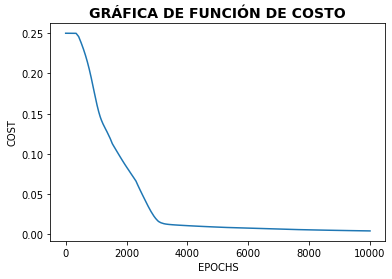

In [15]:
params_HL1_final, params_HL2_final, params_output_final = red.train_func(x, y, params_HL1, params_HL2, params_output, epochs, lr)

#### TEST - PREDICCIONES

In [16]:
HL2, output_table = red.predicciones(x, params_HL1_final, params_HL2_final, params_output_final)
output_table

,Input,XOR
0,"[1, 1]",0
1,"[1, 0]",1
2,"[0, 1]",1
3,"[0, 0]",0


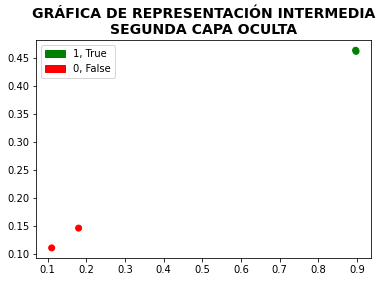

In [17]:
# Gráfica de capa intermedia, segunda capa oculta
red.graph_HL2(HL2)

### EXPERIMENTO 4

#### INICIALIZAR PARÁMETROS

In [18]:
params_HL1, params_HL2, params_output, b_HL1, b_HL2, b_output = red.init_params(x, neurons_HL1, neurons_HL2, neurons_output)

#### ENTRENAMIENTO

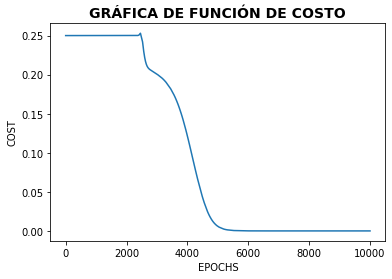

In [19]:
params_HL1_final, params_HL2_final, params_output_final = red.train_func(x, y, params_HL1, params_HL2, params_output, epochs, lr)

#### TEST - PREDICCIONES

In [20]:
HL2, output_table = red.predicciones(x, params_HL1_final, params_HL2_final, params_output_final)
output_table

,Input,XOR
0,"[1, 1]",0
1,"[1, 0]",1
2,"[0, 1]",1
3,"[0, 0]",0


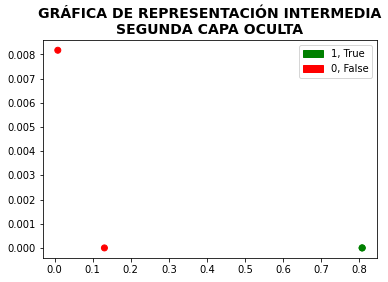

In [21]:
# Gráfica de capa intermedia, segunda capa oculta
red.graph_HL2(HL2)

### EXPERIMENTO 5

#### INICIALIZAR PARÁMETROS

In [22]:
params_HL1, params_HL2, params_output, b_HL1, b_HL2, b_output = red.init_params(x, neurons_HL1, neurons_HL2, neurons_output)

#### ENTRENAMIENTO

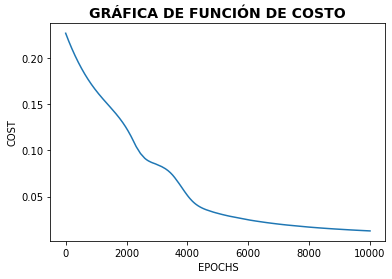

In [23]:
params_HL1_final, params_HL2_final, params_output_final = red.train_func(x, y, params_HL1, params_HL2, params_output, epochs, lr)

#### TEST - PREDICCIONES

In [24]:
HL2, output_table = red.predicciones(x, params_HL1_final, params_HL2_final, params_output_final)
output_table

,Input,XOR
0,"[1, 1]",0
1,"[1, 0]",1
2,"[0, 1]",1
3,"[0, 0]",0


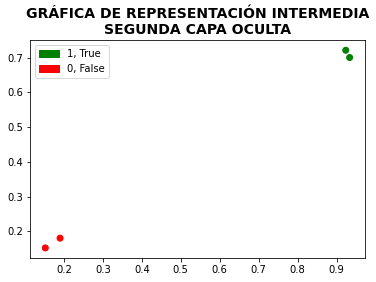

In [25]:
# Gráfica de capa intermedia, segunda capa oculta
red.graph_HL2(HL2)

### CONCLUSIONES

1. Se puede observar en los distintos experimentos que el valor inicial que tomen los parámetros influyen directamente en el resultado de las predicciones, en el primer experimento se observa que no converge y en los siguientes 4 experimentos si.

2. El comportamiento del decaimiento de la función de costo también se ve afectada por el valor inicial de los parámetros.

3. Al graficar la segunda capa oculta se puede observar que en cualquie experimento es posible separar ambas clases, concluyendo que en la segunda capa intermedia son linealmente separables.